In [46]:
# steps for EDA
# -----------------


# 1. Understanding the data
# 2. looking at the data
# 3. visualising the data
# 4. dealing with outliers
# 5. dealing with missing values
# 6. doing the data standarisation

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
agriculture = pd.read_csv("./agr.csv")
agriculture

,Year,Groundnut,Rapeseed & Mustard,Soyabean,Total Oilseeds,Coffee,Cotton (Lint),Raw Jute & Mesta,Sugarcane,Tea,Tobacco
0,1950-1951,35.0,8.0,NaN,52.0,NaN,30.0,33.0,571.0,NaN,3
1,1951-1952,32.0,9.0,NaN,50.0,NaN,33.0,47.0,616.0,NaN,2
2,1952-1953,29.0,9.0,NaN,47.0,NaN,33.0,53.0,510.0,NaN,3
3,1953-1954,35.0,9.0,NaN,54.0,NaN,41.0,38.0,444.0,NaN,3
4,1954-1955,43.0,10.0,NaN,64.0,NaN,45.0,39.0,587.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...
69,2019-2020,99.5,91.2,112.3,332.2,2980,360.7,98.8,3705.0,13608.1,8
70,2020-2021,102.4,102.1,126.1,359.5,3340,352.5,93.5,4054.0,12803.3,7.6
71,2021-2022,101.4,119.6,129.9,379.6,3420.02,311.2,101.5,4394.3,13444.02,-
72,2022-2023 (Target),104.1,121.0,147.7,413.5,-,370.0,105.0,4150.0,-,-


In [3]:
agriculture.shape

(74, 11)

In [4]:
agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                74 non-null     object 
 1   Groundnut           74 non-null     float64
 2   Rapeseed & Mustard  74 non-null     float64
 3   Soyabean            54 non-null     float64
 4   Total Oilseeds      74 non-null     float64
 5   Coffee              54 non-null     object 
 6   Cotton (Lint)       74 non-null     float64
 7   Raw Jute & Mesta    74 non-null     float64
 8   Sugarcane           74 non-null     float64
 9   Tea                 54 non-null     object 
 10  Tobacco             74 non-null     object 
dtypes: float64(7), object(4)
memory usage: 6.5+ KB


In [5]:
agriculture.head()

,Year,Groundnut,Rapeseed & Mustard,Soyabean,Total Oilseeds,Coffee,Cotton (Lint),Raw Jute & Mesta,Sugarcane,Tea,Tobacco
0,1950-1951,35.0,8.0,NaN,52.0,NaN,30.0,33.0,571.0,NaN,3
1,1951-1952,32.0,9.0,NaN,50.0,NaN,33.0,47.0,616.0,NaN,2
2,1952-1953,29.0,9.0,NaN,47.0,NaN,33.0,53.0,510.0,NaN,3
3,1953-1954,35.0,9.0,NaN,54.0,NaN,41.0,38.0,444.0,NaN,3
4,1954-1955,43.0,10.0,NaN,64.0,NaN,45.0,39.0,587.0,NaN,3


In [6]:
agriculture.columns

Index(['Year', 'Groundnut', 'Rapeseed & Mustard', 'Soyabean', 'Total Oilseeds',
       'Coffee', 'Cotton (Lint)', 'Raw Jute & Mesta', 'Sugarcane', 'Tea',
       'Tobacco'],
      dtype='object')

In [7]:
agriculture.isna().sum()

Year                   0
Groundnut              0
Rapeseed & Mustard     0
Soyabean              20
Total Oilseeds         0
Coffee                20
Cotton (Lint)          0
Raw Jute & Mesta       0
Sugarcane              0
Tea                   20
Tobacco                0
dtype: int64

In [8]:
agriculture.describe()

,Groundnut,Rapeseed & Mustard,Soyabean,Total Oilseeds,Cotton (Lint),Raw Jute & Mesta,Sugarcane
count,74.000000,74.000000,54.000000,74.000000,74.000000,74.000000,74.000000
mean,64.312162,42.377027,57.659259,170.509459,134.855405,84.241892,2145.698649
std,18.949883,31.409206,50.410120,103.188042,108.912295,23.083588,1129.931194
min,29.000000,8.000000,0.100000,47.000000,30.000000,33.000000,444.000000
25%,50.325000,14.400000,6.800000,78.725000,57.425000,68.025000,1241.625000
50%,61.450000,32.600000,51.900000,128.200000,85.650000,83.500000,1931.250000
75%,75.625000,65.225000,102.675000,246.575000,179.825000,105.150000,2950.450000
max,104.100000,124.900000,149.800000,413.500000,370.000000,126.500000,4942.300000


In [9]:
agriculture[:10]

,Year,Groundnut,Rapeseed & Mustard,Soyabean,Total Oilseeds,Coffee,Cotton (Lint),Raw Jute & Mesta,Sugarcane,Tea,Tobacco
0,1950-1951,35.0,8.0,NaN,52.0,NaN,30.0,33.0,571.0,NaN,3
1,1951-1952,32.0,9.0,NaN,50.0,NaN,33.0,47.0,616.0,NaN,2
2,1952-1953,29.0,9.0,NaN,47.0,NaN,33.0,53.0,510.0,NaN,3
3,1953-1954,35.0,9.0,NaN,54.0,NaN,41.0,38.0,444.0,NaN,3
4,1954-1955,43.0,10.0,NaN,64.0,NaN,45.0,39.0,587.0,NaN,3
5,1955-1956,39.0,9.0,NaN,57.0,NaN,42.0,54.0,605.0,NaN,3
6,1956-1957,44.0,10.0,NaN,64.0,NaN,49.0,58.0,691.0,NaN,3
7,1957-1958,47.0,9.0,NaN,64.0,NaN,50.0,53.0,712.0,NaN,2
8,1958-1959,52.0,10.0,NaN,73.0,NaN,49.0,69.0,734.0,NaN,3
9,1959-1960,46.0,11.0,NaN,66.0,NaN,37.0,57.0,778.0,NaN,3


In [10]:
agriculture[-10:]

,Year,Groundnut,Rapeseed & Mustard,Soyabean,Total Oilseeds,Coffee,Cotton (Lint),Raw Jute & Mesta,Sugarcane,Tea,Tobacco
64,2014-2015,74.0,62.8,103.7,275.1,3270,348.1,111.3,3623.3,11971.8,8.6
65,2015-2016,67.3,67.9,85.7,220.9,3480,300.0,105.2,3484.4,12331.4,8
66,2016-2017,74.6,79.2,131.6,312.8,3120,325.8,109.6,3060.7,12504.9,8.1
67,2017-2018,92.5,84.3,109.3,314.6,3160,328.1,100.3,3799.1,13250.5,9.5
68,2018-2019,67.3,92.6,132.7,315.2,3195,280.4,98.2,4054.2,13500.4,6.6
69,2019-2020,99.5,91.2,112.3,332.2,2980,360.7,98.8,3705.0,13608.1,8
70,2020-2021,102.4,102.1,126.1,359.5,3340,352.5,93.5,4054.0,12803.3,7.6
71,2021-2022,101.4,119.6,129.9,379.6,3420.02,311.2,101.5,4394.3,13444.02,-
72,2022-2023 (Target),104.1,121.0,147.7,413.5,-,370.0,105.0,4150.0,-,-
73,2022-20231,102.8,124.9,149.8,410.0,-,343.5,94.9,4942.3,-,-


In [11]:
agriculture[4:16]

,Year,Groundnut,Rapeseed & Mustard,Soyabean,Total Oilseeds,Coffee,Cotton (Lint),Raw Jute & Mesta,Sugarcane,Tea,Tobacco
4,1954-1955,43.0,10.0,NaN,64.0,NaN,45.0,39.0,587.0,NaN,3
5,1955-1956,39.0,9.0,NaN,57.0,NaN,42.0,54.0,605.0,NaN,3
6,1956-1957,44.0,10.0,NaN,64.0,NaN,49.0,58.0,691.0,NaN,3
7,1957-1958,47.0,9.0,NaN,64.0,NaN,50.0,53.0,712.0,NaN,2
8,1958-1959,52.0,10.0,NaN,73.0,NaN,49.0,69.0,734.0,NaN,3
9,1959-1960,46.0,11.0,NaN,66.0,NaN,37.0,57.0,778.0,NaN,3
10,1960-1961,48.0,14.0,NaN,70.0,NaN,56.0,53.0,1100.0,NaN,3
11,1961-1962,50.0,14.0,NaN,73.0,NaN,49.0,82.0,1040.0,NaN,3
12,1962-1963,51.0,13.0,NaN,74.0,NaN,55.0,72.0,919.0,NaN,3
13,1963-1964,53.0,9.2,NaN,71.3,NaN,57.5,79.8,1042.3,NaN,3.6


(array([ 4.,  6., 13., 10.,  8., 12.,  8.,  3.,  3.,  7.]),
 array([ 29.  ,  36.51,  44.02,  51.53,  59.04,  66.55,  74.06,  81.57,
         89.08,  96.59, 104.1 ]),
 <BarContainer object of 10 artists>)

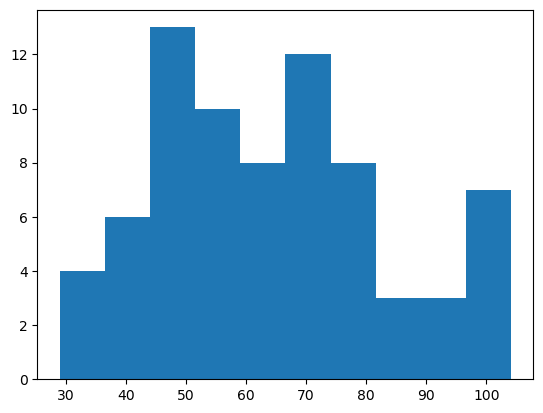

In [12]:

plt.xlabel="ground_nut"
plt.ylabel="frequency"
plt.hist(agriculture.Groundnut, bins=10)

<AxesSubplot:xlabel='Groundnut', ylabel='Count'>

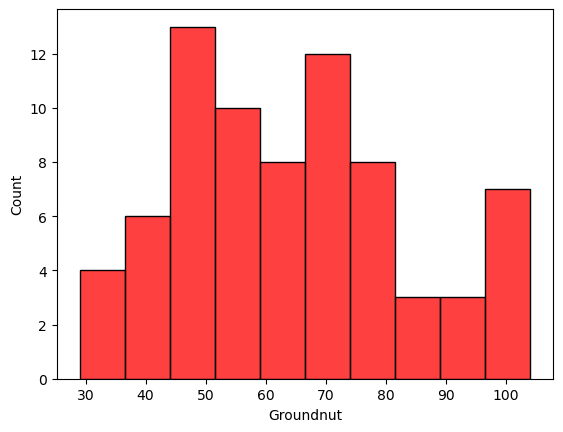

In [13]:
sns.histplot(agriculture.Groundnut, bins=10,color="red")

C:\Users\amalv\anaconda3\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


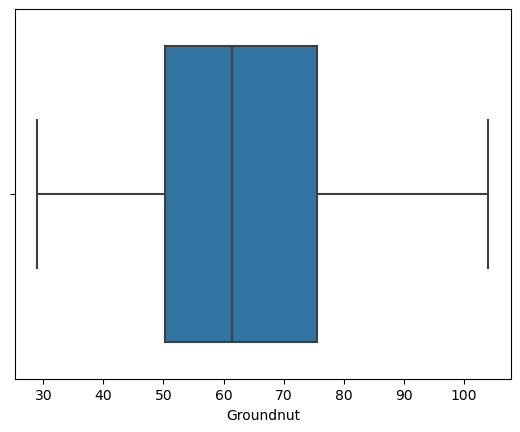

In [14]:
sns.boxplot(agriculture.Groundnut,);

<AxesSubplot:xlabel='Total Oilseeds', ylabel='Count'>

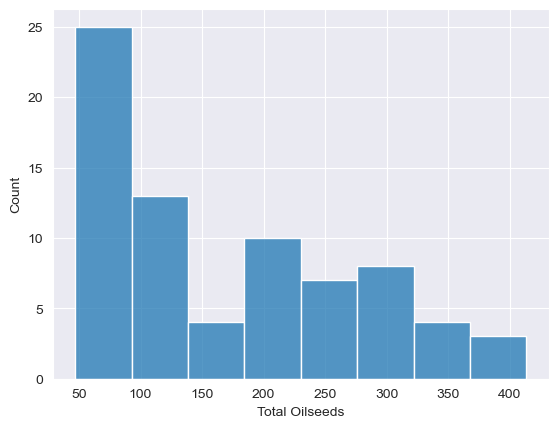

In [15]:
sns.set_style("darkgrid")
sns.histplot(agriculture["Total Oilseeds"])

In [16]:
round(agriculture.Groundnut.mean())

64

In [17]:
np.mean(agriculture)

C:\Users\amalv\anaconda3\jupyter\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\amalv\anaconda3\jupyter\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Groundnut               64.312162
Rapeseed & Mustard      42.377027
Soyabean                57.659259
Total Oilseeds         170.509459
Cotton (Lint)          134.855405
Raw Jute & Mesta        84.241892
Sugarcane             2145.698649
dtype: float64

In [18]:
agriculture["Groundnut"] = np.where(agriculture["Groundnut"] == 0, 64.31, agriculture['Groundnut'])

In [19]:
agriculture.head()


,Year,Groundnut,Rapeseed & Mustard,Soyabean,Total Oilseeds,Coffee,Cotton (Lint),Raw Jute & Mesta,Sugarcane,Tea,Tobacco
0,1950-1951,35.0,8.0,NaN,52.0,NaN,30.0,33.0,571.0,NaN,3
1,1951-1952,32.0,9.0,NaN,50.0,NaN,33.0,47.0,616.0,NaN,2
2,1952-1953,29.0,9.0,NaN,47.0,NaN,33.0,53.0,510.0,NaN,3
3,1953-1954,35.0,9.0,NaN,54.0,NaN,41.0,38.0,444.0,NaN,3
4,1954-1955,43.0,10.0,NaN,64.0,NaN,45.0,39.0,587.0,NaN,3


In [20]:
agriculture["Groundnut"].fillna(64.31)

0      35.0
1      32.0
2      29.0
3      35.0
4      43.0
      ...  
69     99.5
70    102.4
71    101.4
72    104.1
73    102.8
Name: Groundnut, Length: 74, dtype: float64

In [21]:
agriculture["Groundnut"].isna().sum()

0

In [22]:
agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                74 non-null     object 
 1   Groundnut           74 non-null     float64
 2   Rapeseed & Mustard  74 non-null     float64
 3   Soyabean            54 non-null     float64
 4   Total Oilseeds      74 non-null     float64
 5   Coffee              54 non-null     object 
 6   Cotton (Lint)       74 non-null     float64
 7   Raw Jute & Mesta    74 non-null     float64
 8   Sugarcane           74 non-null     float64
 9   Tea                 54 non-null     object 
 10  Tobacco             74 non-null     object 
dtypes: float64(7), object(4)
memory usage: 6.5+ KB


C:\Users\amalv\anaconda3\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


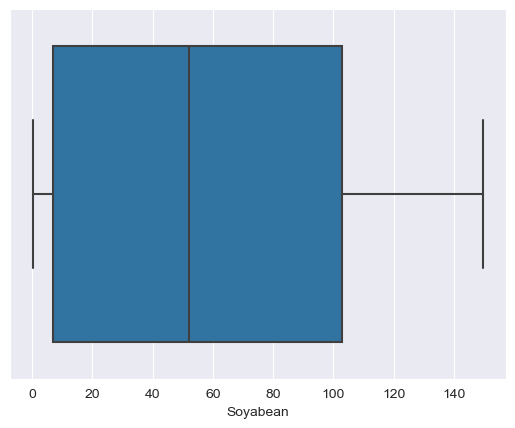

In [23]:
sns.boxplot(agriculture["Soyabean"]);

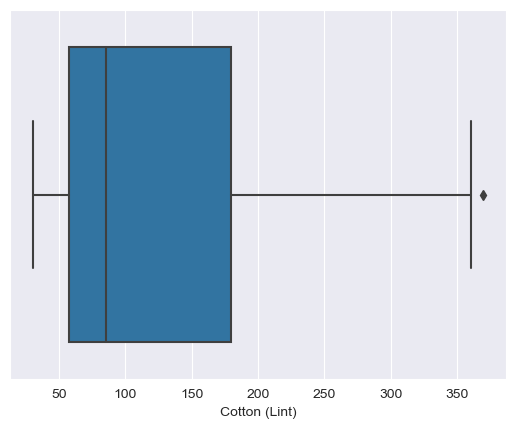

In [24]:
sns.boxplot(x=agriculture["Cotton (Lint)"]);

In [25]:
agriculture["Cotton (Lint)"] = np.where(agriculture["Cotton (Lint)"]>350,350,agriculture["Cotton (Lint)"])

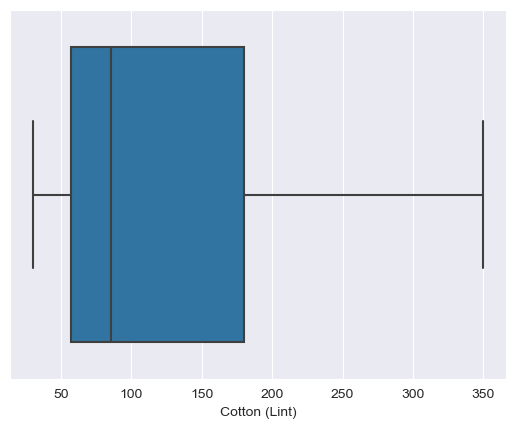

In [26]:
sns.boxplot(x=agriculture["Cotton (Lint)"]);

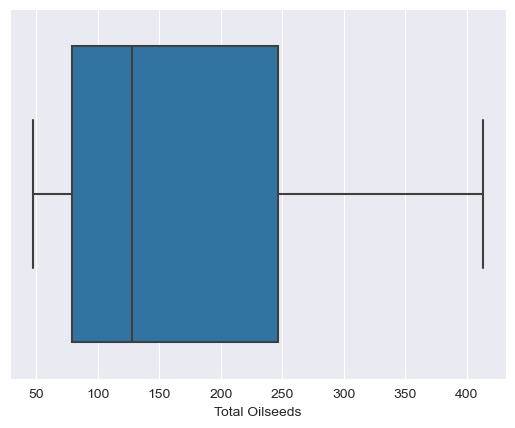

In [27]:
sns.boxplot(x=agriculture["Total Oilseeds"]);

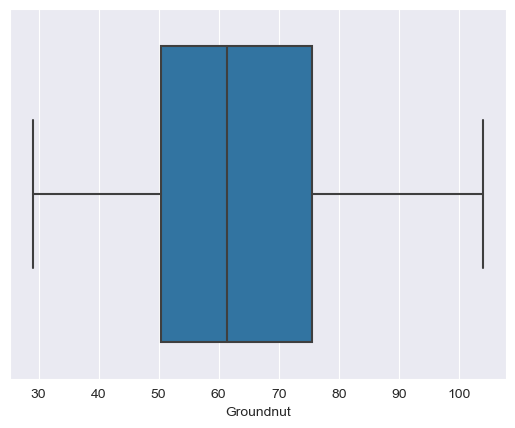

In [28]:
sns.boxplot(x=agriculture["Groundnut"]);

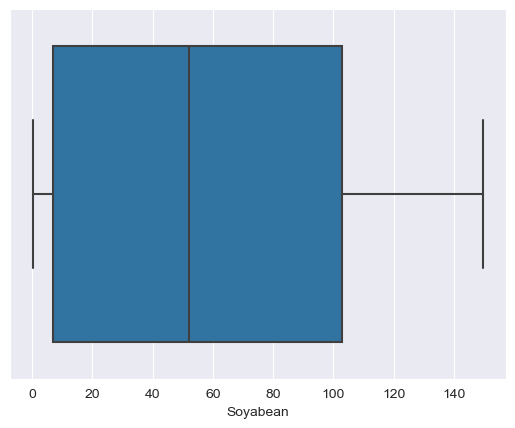

In [29]:
sns.boxplot(x=agriculture["Soyabean"]);

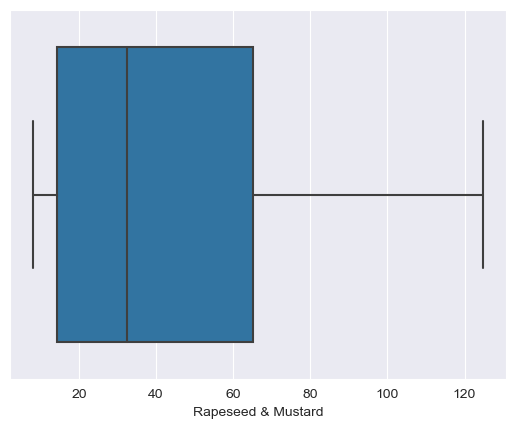

In [30]:
sns.boxplot(x=agriculture["Rapeseed & Mustard"]);

In [31]:
agriculture.columns

Index(['Year', 'Groundnut', 'Rapeseed & Mustard', 'Soyabean', 'Total Oilseeds',
       'Coffee', 'Cotton (Lint)', 'Raw Jute & Mesta', 'Sugarcane', 'Tea',
       'Tobacco'],
      dtype='object')

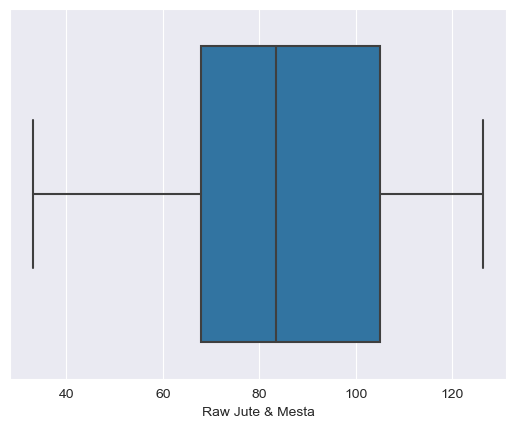

In [32]:
sns.boxplot(x=agriculture["Raw Jute & Mesta"]);

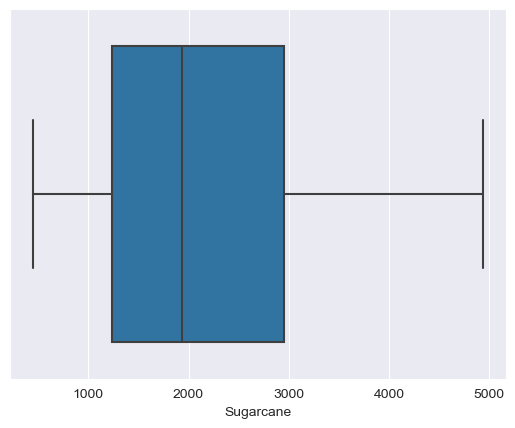

In [33]:
sns.boxplot(x=agriculture["Sugarcane"]);

In [34]:
agriculture.fillna(0)

,Year,Groundnut,Rapeseed & Mustard,Soyabean,Total Oilseeds,Coffee,Cotton (Lint),Raw Jute & Mesta,Sugarcane,Tea,Tobacco
0,1950-1951,35.0,8.0,0.0,52.0,0,30.0,33.0,571.0,0,3
1,1951-1952,32.0,9.0,0.0,50.0,0,33.0,47.0,616.0,0,2
2,1952-1953,29.0,9.0,0.0,47.0,0,33.0,53.0,510.0,0,3
3,1953-1954,35.0,9.0,0.0,54.0,0,41.0,38.0,444.0,0,3
4,1954-1955,43.0,10.0,0.0,64.0,0,45.0,39.0,587.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
69,2019-2020,99.5,91.2,112.3,332.2,2980,350.0,98.8,3705.0,13608.1,8
70,2020-2021,102.4,102.1,126.1,359.5,3340,350.0,93.5,4054.0,12803.3,7.6
71,2021-2022,101.4,119.6,129.9,379.6,3420.02,311.2,101.5,4394.3,13444.02,-
72,2022-2023 (Target),104.1,121.0,147.7,413.5,-,350.0,105.0,4150.0,-,-


In [35]:
agriculture.isna().sum()

Year                   0
Groundnut              0
Rapeseed & Mustard     0
Soyabean              20
Total Oilseeds         0
Coffee                20
Cotton (Lint)          0
Raw Jute & Mesta       0
Sugarcane              0
Tea                   20
Tobacco                0
dtype: int64

In [36]:
agriculture["Soyabean"].fillna(0)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
      ...  
69    112.3
70    126.1
71    129.9
72    147.7
73    149.8
Name: Soyabean, Length: 74, dtype: float64

In [37]:
agriculture["Soyabean"]=agriculture["Soyabean"].fillna(0)

In [38]:
agriculture.isna().sum()

Year                   0
Groundnut              0
Rapeseed & Mustard     0
Soyabean               0
Total Oilseeds         0
Coffee                20
Cotton (Lint)          0
Raw Jute & Mesta       0
Sugarcane              0
Tea                   20
Tobacco                0
dtype: int64

In [39]:
agriculture["Coffee"].fillna(0, inplace=True)

In [40]:
agriculture2 = agriculture.fillna(value=0)

In [41]:
agriculture2

,Year,Groundnut,Rapeseed & Mustard,Soyabean,Total Oilseeds,Coffee,Cotton (Lint),Raw Jute & Mesta,Sugarcane,Tea,Tobacco
0,1950-1951,35.0,8.0,0.0,52.0,0,30.0,33.0,571.0,0,3
1,1951-1952,32.0,9.0,0.0,50.0,0,33.0,47.0,616.0,0,2
2,1952-1953,29.0,9.0,0.0,47.0,0,33.0,53.0,510.0,0,3
3,1953-1954,35.0,9.0,0.0,54.0,0,41.0,38.0,444.0,0,3
4,1954-1955,43.0,10.0,0.0,64.0,0,45.0,39.0,587.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
69,2019-2020,99.5,91.2,112.3,332.2,2980,350.0,98.8,3705.0,13608.1,8
70,2020-2021,102.4,102.1,126.1,359.5,3340,350.0,93.5,4054.0,12803.3,7.6
71,2021-2022,101.4,119.6,129.9,379.6,3420.02,311.2,101.5,4394.3,13444.02,-
72,2022-2023 (Target),104.1,121.0,147.7,413.5,-,350.0,105.0,4150.0,-,-


In [42]:
agriculture.isnull().sum().summ()

AttributeError: 'Series' object has no attribute 'summ'

In [43]:
# null value with previous value

agriculture3 = agriculture.fillna(method = 'pad')

In [44]:
# ffill 

agriculture3.isnull().sum()

Year                   0
Groundnut              0
Rapeseed & Mustard     0
Soyabean               0
Total Oilseeds         0
Coffee                 0
Cotton (Lint)          0
Raw Jute & Mesta       0
Sugarcane              0
Tea                   20
Tobacco                0
dtype: int64

In [8]:
# filling na values with next value 


agriculture4 = agriculture.fillna(method= "bfill")

In [9]:
agriculture4.isnull().sum()

Year                  0
Groundnut             0
Rapeseed & Mustard    0
Soyabean              0
Total Oilseeds        0
Coffee                0
Cotton (Lint)         0
Raw Jute & Mesta      0
Sugarcane             0
Tea                   0
Tobacco               0
dtype: int64

In [9]:
agriculture4 = agriculture.fillna(method= "bfill", axis=1)

In [11]:
agriculture['Tobacco'] = agriculture['Tobacco'].interpolate(method= "linear")

In [12]:
agriculture.columns

Index(['Year', 'Groundnut', 'Rapeseed & Mustard', 'Soyabean', 'Total Oilseeds',
       'Coffee', 'Cotton (Lint)', 'Raw Jute & Mesta', 'Sugarcane', 'Tea',
       'Tobacco'],
      dtype='object')

In [13]:
agriculture

,Year,Groundnut,Rapeseed & Mustard,Soyabean,Total Oilseeds,Coffee,Cotton (Lint),Raw Jute & Mesta,Sugarcane,Tea,Tobacco
0,1950-1951,35.0,8.0,NaN,52.0,NaN,30.0,33.0,571.0,NaN,3
1,1951-1952,32.0,9.0,NaN,50.0,NaN,33.0,47.0,616.0,NaN,2
2,1952-1953,29.0,9.0,NaN,47.0,NaN,33.0,53.0,510.0,NaN,3
3,1953-1954,35.0,9.0,NaN,54.0,NaN,41.0,38.0,444.0,NaN,3
4,1954-1955,43.0,10.0,NaN,64.0,NaN,45.0,39.0,587.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...
69,2019-2020,99.5,91.2,112.3,332.2,2980,360.7,98.8,3705.0,13608.1,8
70,2020-2021,102.4,102.1,126.1,359.5,3340,352.5,93.5,4054.0,12803.3,7.6
71,2021-2022,101.4,119.6,129.9,379.6,3420.02,311.2,101.5,4394.3,13444.02,-
72,2022-2023 (Target),104.1,121.0,147.7,413.5,-,370.0,105.0,4150.0,-,-


In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [11]:
min_max_sealir = preprocessing.MinMaxScaler()
agriculture4[[ 'Groundnut', 'Rapeseed & Mustard', 'Soyabean', 'Total Oilseeds',
       'Coffee', 'Cotton (Lint)', 'Raw Jute & Mesta', 'Sugarcane', 'Tea',
       'Tobacco']]= MinMaxScaler.fit_transform(agriculture4[[ 'Groundnut', 'Rapeseed & Mustard', 'Soyabean', 'Total Oilseeds',
       'Coffee', 'Cotton (Lint)', 'Raw Jute & Mesta', 'Sugarcane', 'Tea','Tobacco']])

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [ ]:
df09 = agriculture.drop(columns="Year")

In [16]:
scaler = MinMaxScaler()
scaler.fit_transform(df09)

NameError: name 'df09' is not defined

In [17]:
agriculture4.columns

Index(['Year', 'Groundnut', 'Rapeseed & Mustard', 'Soyabean', 'Total Oilseeds',
       'Coffee', 'Cotton (Lint)', 'Raw Jute & Mesta', 'Sugarcane', 'Tea',
       'Tobacco'],
      dtype='object')

In [18]:
agriculture4.isna().sum()

Year                  0
Groundnut             0
Rapeseed & Mustard    0
Soyabean              0
Total Oilseeds        0
Coffee                0
Cotton (Lint)         0
Raw Jute & Mesta      0
Sugarcane             0
Tea                   0
Tobacco               0
dtype: int64

In [12]:
from sklearn import preprocessing
min_max_sealir = preprocessing.min_max_sealir()
agriculture4[['Year', 'Groundnut', 'Rapeseed & Mustard', 'Soyabean', 'Total Oilseeds',
       'Coffee', 'Cotton (Lint)', 'Raw Jute & Mesta', 'Sugarcane', 'Tea',
       'Tobacco']] = min_max_sealir.fit_transform(agriculture4[['Year', 'Groundnut', 'Rapeseed & Mustard', 'Soyabean', 'Total Oilseeds',
       'Coffee', 'Cotton (Lint)', 'Raw Jute & Mesta', 'Sugarcane', 'Tea',
       'Tobacco']])

AttributeError: module 'sklearn.preprocessing' has no attribute 'min_max_sealir'

In [13]:
agriculture4 = agriculture4.dropna(how='any')

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
agriculture4.columns

Index(['Year', 'Groundnut', 'Rapeseed & Mustard', 'Soyabean', 'Total Oilseeds',
       'Coffee', 'Cotton (Lint)', 'Raw Jute & Mesta', 'Sugarcane', 'Tea',
       'Tobacco'],
      dtype='object')

In [16]:
agriculture4 = agriculture4.drop(columns="Year")

In [17]:
scaler = StandardScaler()
scaler.fit(agriculture4)
scaler.transform(agriculture4)

ValueError: could not convert string to float: '-'

In [18]:
from sklearn import preprocessing


In [19]:
min_max_scaler = preprocessing.MinMaxScaler()

In [20]:

agriculture4[['Groundnut','Soyabean']] = min_max_scaler.fit_transform(agriculture4[['Groundnut','Soyabean']])

In [21]:
agriculture4

,Groundnut,Rapeseed & Mustard,Soyabean,Total Oilseeds,Coffee,Cotton (Lint),Raw Jute & Mesta,Sugarcane,Tea,Tobacco
0,0.079893,8.0,0.346693,52.0,30.0,30.0,33.0,571.0,3,3
1,0.039947,9.0,0.333333,50.0,33.0,33.0,47.0,616.0,2,2
2,0.000000,9.0,0.313293,47.0,33.0,33.0,53.0,510.0,3,3
3,0.079893,9.0,0.360053,54.0,41.0,41.0,38.0,444.0,3,3
4,0.186418,10.0,0.426854,64.0,45.0,45.0,39.0,587.0,3,3
...,...,...,...,...,...,...,...,...,...,...
69,0.938748,91.2,0.749499,332.2,2980,360.7,98.8,3705.0,13608.1,8
70,0.977364,102.1,0.841683,359.5,3340,352.5,93.5,4054.0,12803.3,7.6
71,0.964048,119.6,0.867067,379.6,3420.02,311.2,101.5,4394.3,13444.02,-
72,1.000000,121.0,0.985972,413.5,-,370.0,105.0,4150.0,-,-


In [27]:
agriculture4["Tobacco"] = agriculture4["Tobacco"].replace("-",np.nan)

In [28]:
agriculture4= agriculture4.dropna(how="any")

In [1]:

agriculture4[['Groundnut', 'Rapeseed & Mustard', 'Soyabean', 'Total Oilseeds',
       'Coffee', 'Cotton (Lint)', 'Raw Jute & Mesta', 'Sugarcane', 'Tea',
       'Tobacco']] = min_max_scaler.fit_transform(agriculture4[['Groundnut', 'Rapeseed & Mustard', 'Soyabean', 'Total Oilseeds',
       'Coffee', 'Cotton (Lint)', 'Raw Jute & Mesta', 'Sugarcane', 'Tea',
       'Tobacco']])

NameError: name 'min_max_scaler' is not defined

In [30]:
agriculture4

,Groundnut,Rapeseed & Mustard,Soyabean,Total Oilseeds,Coffee,Cotton (Lint),Raw Jute & Mesta,Sugarcane,Tea,Tobacco
0,35.0,8.0,52.0,52.0,30.0,30.0,33.0,571.0,3,3
1,32.0,9.0,50.0,50.0,33.0,33.0,47.0,616.0,2,2
2,29.0,9.0,47.0,47.0,33.0,33.0,53.0,510.0,3,3
3,35.0,9.0,54.0,54.0,41.0,41.0,38.0,444.0,3,3
4,43.0,10.0,64.0,64.0,45.0,45.0,39.0,587.0,3,3
...,...,...,...,...,...,...,...,...,...,...
66,74.6,79.2,131.6,312.8,3120,325.8,109.6,3060.7,12504.9,8.1
67,92.5,84.3,109.3,314.6,3160,328.1,100.3,3799.1,13250.5,9.5
68,67.3,92.6,132.7,315.2,3195,280.4,98.2,4054.2,13500.4,6.6
69,99.5,91.2,112.3,332.2,2980,360.7,98.8,3705.0,13608.1,8


## data visualisation using python

In [31]:
import matplotlib.pyplot as plt
sns.set_style(style="whitegrid")

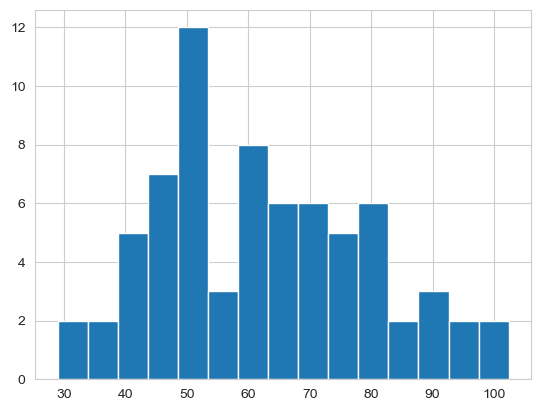

In [32]:
plt.hist(agriculture4["Groundnut"],bins=15);

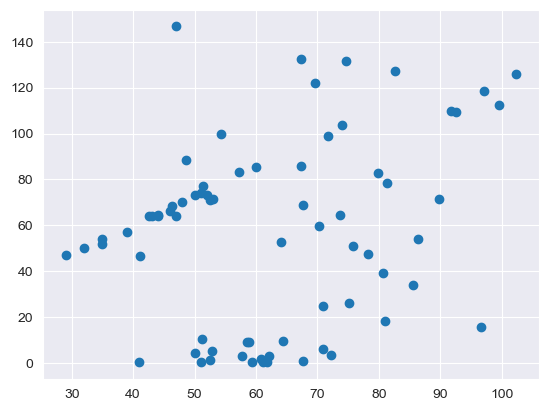

In [33]:
sns.set_style(style="darkgrid")
plt.scatter(x=agriculture4["Groundnut"], y=agriculture4["Soyabean"])

### drWING PIE CHART 

In [37]:
agriculture4.columns

Index(['Groundnut', 'Rapeseed & Mustard', 'Soyabean', 'Total Oilseeds',
       'Coffee', 'Cotton (Lint)', 'Raw Jute & Mesta', 'Sugarcane', 'Tea',
       'Tobacco'],
      dtype='object')

In [39]:
crop=["Groundnut","Raw Jute & Mesta","Sugarcane"]

In [40]:
production=[67.3,92.6,132.7]

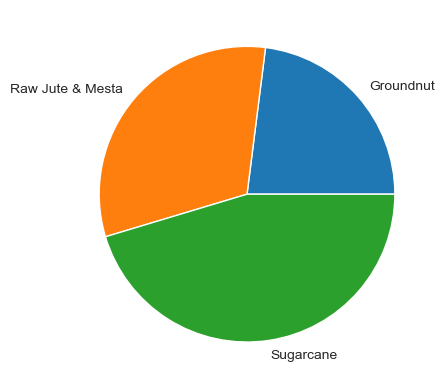

In [45]:
plt.pie(production,labels=crop);

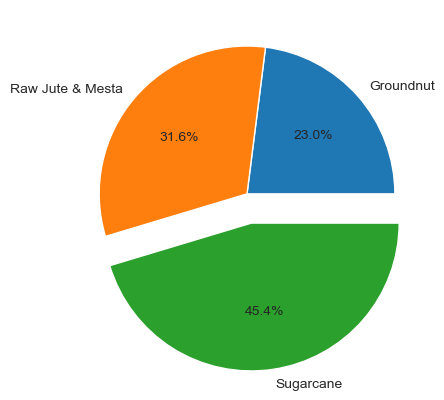

In [47]:
slice = (0,0,0.2)
# plt.pie(production,labels=crop);
plt.pie(production,labels=crop,explode=slice, autopct="%1.1f%%");

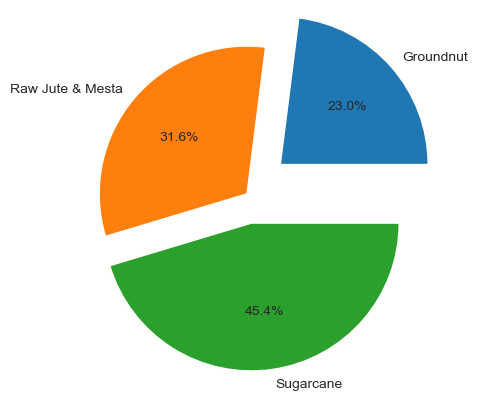

In [48]:
slice = (.3,0,0.2)
# plt.pie(production,labels=crop);
plt.pie(production,labels=crop,explode=slice, autopct="%1.1f%%");

# area chart

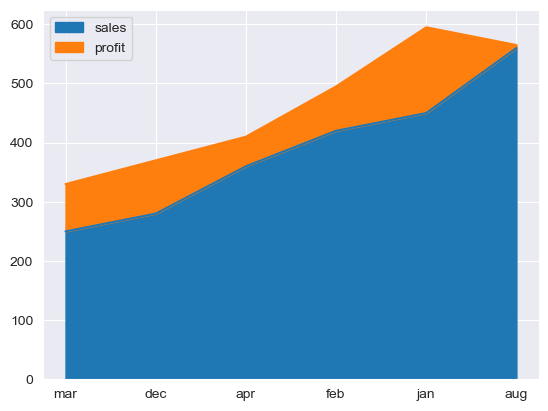

In [51]:
data_d = {"sales":(250,280,360,420,450,560),"profit": (80,90,50,75,145,5)};
months = {"jan","feb","mar","apr","aug","dec"};
df = pd.DataFrame(data_d, index = months);
df.plot.area();

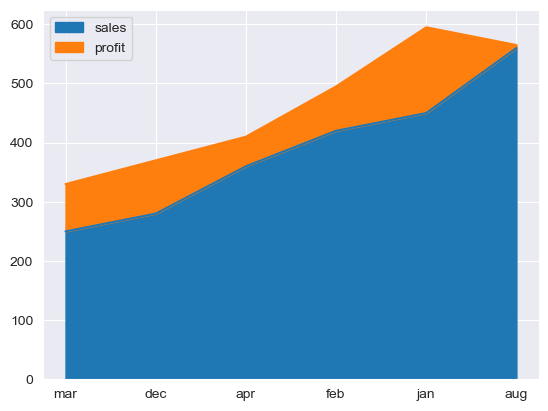

In [52]:
data_d = {"sales":[250,280,360,420,450,560],"profit": [80,90,50,75,145,5]};
months = {"jan","feb","mar","apr","aug","dec"};
df = pd.DataFrame(data_d, index = months);
df.plot.area();

# mess grid

In [56]:
x= np.random.randint(0,50,7)
y = np.random.randint(-10,10,5)
xvalues,yvalues = np.meshgrid(x,y)
print("x values = ")
print(xvalues)
print("y values = ")
print(yvalues)

x values = 
[[47 31  5 18 21 29 19]
 [47 31  5 18 21 29 19]
 [47 31  5 18 21 29 19]
 [47 31  5 18 21 29 19]
 [47 31  5 18 21 29 19]]
y values = 
[[ 2  2  2  2  2  2  2]
 [ 4  4  4  4  4  4  4]
 [ 7  7  7  7  7  7  7]
 [-6 -6 -6 -6 -6 -6 -6]
 [-8 -8 -8 -8 -8 -8 -8]]


# quiver plot 

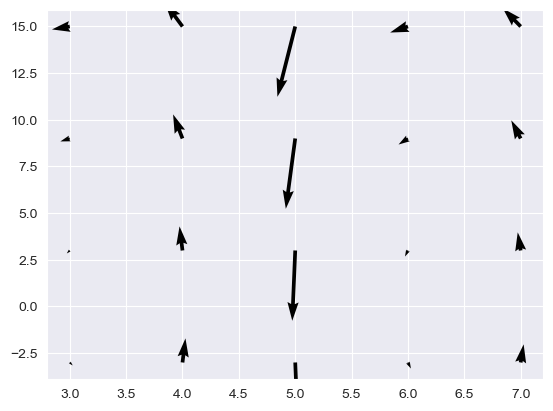

In [60]:
x = np.linspace(3,7,5)
y = np.linspace(-3,15,4)

xvalues,yvalues = np.meshgrid(x,y)
v= np.tan(xvalues)
u = np.tan(yvalues)
plt.quiver(xvalues,yvalues,u,v)

# contour

In [62]:
x =(-6,-4,-2,0,2,4,6)
y = (-3,-2,-1,0,1,2,3)

xvalues,yvalues = np.meshgrid(x,y)
xvalues
yvalues

array([[-3, -3, -3, -3, -3, -3, -3],
       [-2, -2, -2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3]])

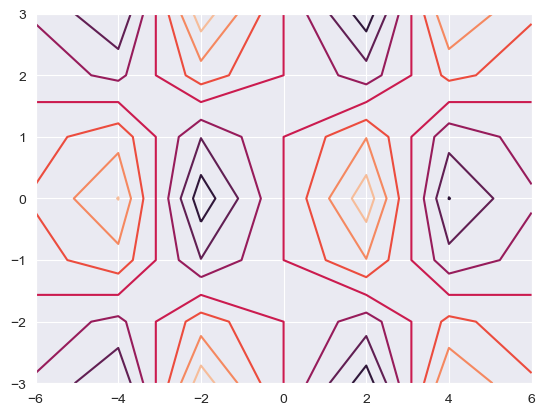

In [63]:
zvalue = np.sin(xvalues)*np.cos(yvalues)
plt.contour(xvalues, yvalues, zvalue)